# Data Science Challenge

## Exercise 3

In first instance, we will play with a sample of the DataFrame to do an EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_bookings = 'challenge/bookings.csv.bz2'
root_searches = 'challenge/searches.csv.bz2'

### Playing with a sample of the data (nrows=100,000)

In [4]:
df_smp_sch = pd.read_csv(root_searches, sep='^', nrows=100000)
df_smp_sch.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [5]:
list(df_smp_sch.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [6]:
df_smp_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               100000 non-null  object
 1   Time               100000 non-null  object
 2   TxnCode            100000 non-null  object
 3   OfficeID           100000 non-null  object
 4   Country            99985 non-null   object
 5   Origin             100000 non-null  object
 6   Destination        100000 non-null  object
 7   RoundTrip          100000 non-null  int64 
 8   NbSegments         100000 non-null  int64 
 9   Seg1Departure      100000 non-null  object
 10  Seg1Arrival        100000 non-null  object
 11  Seg1Date           99605 non-null   object
 12  Seg1Carrier        37841 non-null   object
 13  Seg1BookingCode    10777 non-null   object
 14  Seg2Departure      72141 non-null   object
 15  Seg2Arrival        72141 non-null   object
 16  Seg2Date           71

In [7]:
search_col = ['Date', 'Destination']
df_smp_sch = df_smp_sch[search_col]
df_smp_sch.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [8]:
df_smp_sch['Date'] = pd.to_datetime(df_smp_sch.Date)
df_smp_sch['year'] = df_smp_sch.Date.dt.year
df_smp_sch['month'] = df_smp_sch.Date.dt.month
df_smp_sch['n'] = 1
df_smp_sch.head()

,Date,Destination,year,month,n
0,2013-01-01,AUH,2013,1,1
1,2013-01-01,MIL,2013,1,1
2,2013-01-01,SFO,2013,1,1
3,2013-01-01,ARN,2013,1,1
4,2013-01-01,MAD,2013,1,1


In [9]:
df_sch_gr = df_smp_sch.groupby(['Date', 'year', 'month', 'Destination'])['n'].sum().reset_index()
df_sch_gr.head()

,Date,year,month,Destination,n
0,2013-01-01,2013,1,ABT,1
1,2013-01-01,2013,1,ABX,1
2,2013-01-01,2013,1,ACC,1
3,2013-01-01,2013,1,ACE,3
4,2013-01-01,2013,1,ADB,1


In [10]:
# Destination filters: AGP, MAD, BCN
iata_code = ['AGP', 'MAD', 'BCN']
df_smp_filt = df_sch_gr[df_sch_gr.Destination.isin(iata_code)]
df_smp_filt.head()

,Date,year,month,Destination,n
6,2013-01-01,2013,1,AGP,7
24,2013-01-01,2013,1,BCN,26
191,2013-01-01,2013,1,MAD,11
380,2013-01-02,2013,1,AGP,4
395,2013-01-02,2013,1,BCN,9


#### First sample plot

It is needed to group the values per month

In [18]:
df_month_gr = df_smp_sch.groupby(['month', 'Destination'])['n'].sum().reset_index()
df_month_gr.head()

,month,Destination,n
0,1,AAE,1
1,1,AAL,6
2,1,AAQ,5
3,1,AAR,3
4,1,ABA,2


In [24]:
df_AGP = df_month_gr[df_month_gr.Destination == 'AGP']
df_MAD = df_month_gr[df_month_gr.Destination == 'MAD']
df_BCN = df_month_gr[df_month_gr.Destination == 'BCN']

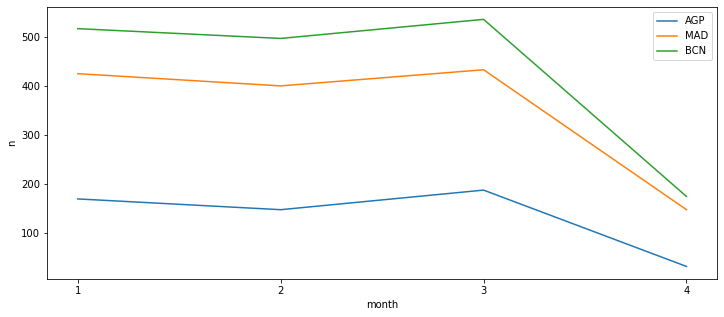

In [30]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.lineplot(data=df_AGP, x='month', y='n', label='AGP')
ax = sns.lineplot(data=df_MAD, x='month', y='n', label='MAD')
ax = sns.lineplot(data=df_BCN, x='month', y='n', label='BCN')

plt.xticks(list(set(df_month_gr.month)))
plt.legend()

plt.show()

### Load the whole dataset

Creating a function (search_cleaner) to clean the chunks:

In [31]:
def search_cleaner(data):
    "Cleaner dedicated to shrink the data imported and treated by pd.read_csv"
    import warnings
    warnings.filterwarnings('ignore')
    
    iata_code = ['AGP', 'MAD', 'BCN']
    
    # Cleaning Date columns
    data['Date'] = data.Date.dropna()
    data['Date'] = data[data.Date.str.len() == 10]   # A Date should have no more than 10 characters
    
    data['Date'] = pd.to_datetime(data.Date)
    data['year'] = data.Date.dt.year
    data['month'] = data.Date.dt.month
    data['n'] = 1
    
    # Cleaning the Date column & filtering by year:
    data = data[data.year == 2013]
    
    # Cleaning the arr_port column: strip, dropna, upper
    data['Destination'] = data.Destination.dropna()
    data['Destination'] = data.Destination.str.strip().str.upper()
    
    # Data Wrangling
    data = data.groupby(['Date', 'year', 'month', 'Destination'])['n'].count().reset_index()
    data = data[data.Destination.isin(iata_code)]
    
    return data

In [32]:
SearchesFile = pd.read_csv(root_searches, usecols=['Date', 'Destination'], sep='^', chunksize=10**6)
chunks = []
loaded_rows = 0
for chunk in SearchesFile:
    loaded_rows += chunk.shape[0]
    cleaned_chunk = search_cleaner(chunk)
    
    chunks.append(cleaned_chunk)
    
    print(cleaned_chunk)
    print("Rows loaded:", loaded_rows)

             Date  year  month Destination   n
6      2013-01-01  2013      1         AGP  21
24     2013-01-01  2013      1         BCN  78
191    2013-01-01  2013      1         MAD  33
380    2013-01-02  2013      1         AGP  12
395    2013-01-02  2013      1         BCN  27
...           ...   ...    ...         ...  ..
139463 2013-12-24  2013     12         BCN  20
139620 2013-12-24  2013     12         MAD  16
139816 2013-12-25  2013     12         AGP   8
139835 2013-12-25  2013     12         BCN  26
140011 2013-12-25  2013     12         MAD  28

[1075 rows x 5 columns]
Rows loaded: 1000000
             Date    year  month Destination   n
6      2013-01-01  2013.0    1.0         AGP  21
24     2013-01-01  2013.0    1.0         BCN  78
191    2013-01-01  2013.0    1.0         MAD  36
380    2013-01-02  2013.0    1.0         AGP  12
395    2013-01-02  2013.0    1.0         BCN  27
...           ...     ...    ...         ...  ..
139463 2013-12-24  2013.0   12.0         BCN  3

In [33]:
df_sch = pd.concat(chunks)
df_sch.head()

,Date,year,month,Destination,n
6,2013-01-01,2013.0,1.0,AGP,21
24,2013-01-01,2013.0,1.0,BCN,78
191,2013-01-01,2013.0,1.0,MAD,33
380,2013-01-02,2013.0,1.0,AGP,12
395,2013-01-02,2013.0,1.0,BCN,27


In [34]:
df_sch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22575 entries, 6 to 140012
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         22575 non-null  datetime64[ns]
 1   year         22575 non-null  float64       
 2   month        22575 non-null  float64       
 3   Destination  22575 non-null  object        
 4   n            22575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.0+ MB


In [35]:
df_sch['year'], df_sch['month'] = df_sch.year.astype(int), df_sch.month.astype(int)

In [36]:
df_AGP = df_sch[df_sch.Destination == 'AGP']
df_AGP.sample(5)

,Date,year,month,Destination,n
34840,2013-04-03,2013,4,AGP,15
35236,2013-04-04,2013,4,AGP,2
112904,2013-10-18,2013,10,AGP,15
12490,2013-02-03,2013,2,AGP,21
114112,2013-10-21,2013,10,AGP,6


In [37]:
df_gr = df_sch.groupby(['Date', 'Destination', 'month'])['n'].sum().reset_index()
df_gr.head()

,Date,Destination,month,n
0,2013-01-01,AGP,1,399
1,2013-01-01,BCN,1,1482
2,2013-01-01,MAD,1,660
3,2013-01-02,AGP,1,228
4,2013-01-02,BCN,1,513


In [38]:
df_gr.groupby(['month', 'Destination'])['n'].count()

month  Destination
1      AGP            31
       BCN            31
       MAD            31
2      AGP            28
       BCN            28
       MAD            28
3      AGP            31
       BCN            31
       MAD            31
4      AGP            30
       BCN            30
       MAD            30
5      AGP            31
       BCN            31
       MAD            31
6      AGP            30
       BCN            30
       MAD            30
7      AGP            31
       BCN            31
       MAD            31
8      AGP            31
       BCN            31
       MAD            31
9      AGP            30
       BCN            30
       MAD            30
10     AGP            31
       BCN            31
       MAD            31
11     AGP            30
       BCN            30
       MAD            30
12     AGP            23
       BCN            25
       MAD            25
Name: n, dtype: int64

### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona
Plot a curve for each city in the same figure

In [39]:
df_AGP = df_gr[df_gr.Destination == 'AGP']
df_MAD = df_gr[df_gr.Destination == 'MAD']
df_BCN = df_gr[df_gr.Destination == 'BCN']

#### Daily lineplot

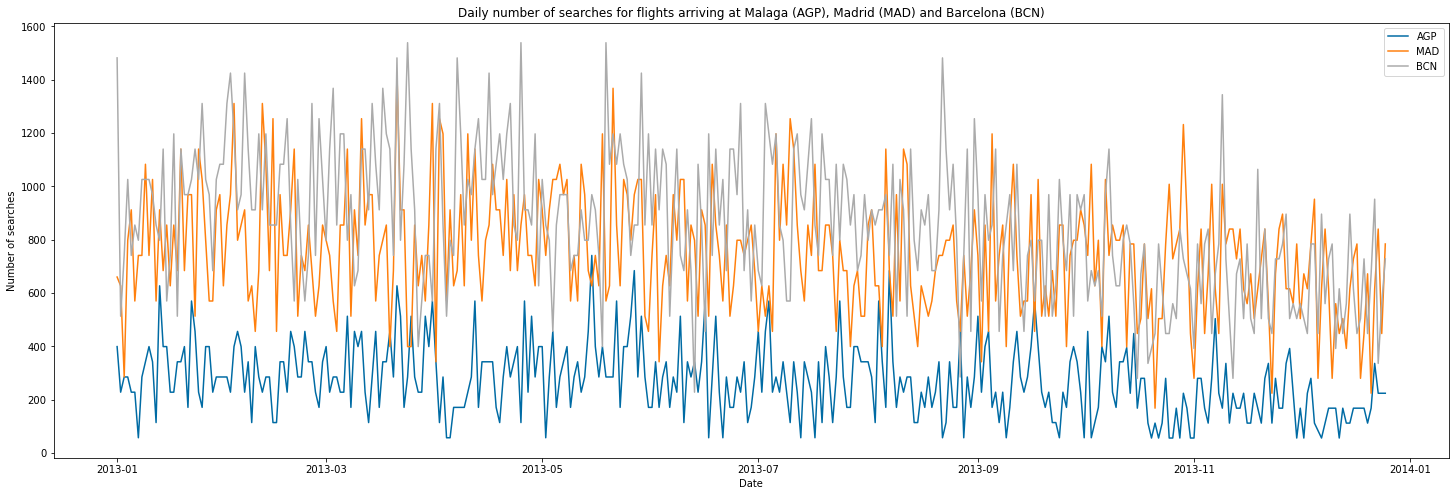

In [40]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(25,8))

ax = plt.plot(df_AGP.Date, df_AGP.n, label='AGP')
ax = plt.plot(df_MAD.Date, df_MAD.n, label='MAD')
ax = plt.plot(df_BCN.Date, df_BCN.n, label='BCN')

plt.legend()
plt.title('Daily number of searches for flights arriving at Malaga (AGP), Madrid (MAD) and Barcelona (BCN)')
plt.xlabel('Date')
plt.ylabel('Number of searches')

plt.show()

Let's have a look at the data at a more global view, using months. In this way it will be easier to take conclusions

In [41]:
def autolabel(splot):
    for p in splot.patches:
        height = p.get_height().astype(int)
        splot.annotate('{:,}'.format(height),
                       xy = (p.get_x() + p.get_width() / 2, height),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')

In [42]:
df_AGP.head()

,Date,Destination,month,n
0,2013-01-01,AGP,1,399
3,2013-01-02,AGP,1,228
6,2013-01-03,AGP,1,285
9,2013-01-04,AGP,1,285
12,2013-01-05,AGP,1,228


In [43]:
df_sns = df_gr.groupby(['month', 'Destination'])['n'].sum().reset_index()
df_sns.head()

,month,Destination,n
0,1,AGP,9633
1,1,BCN,29469
2,1,MAD,24258
3,2,AGP,8379
4,2,BCN,28329


In [47]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

#### Monthly lineplot

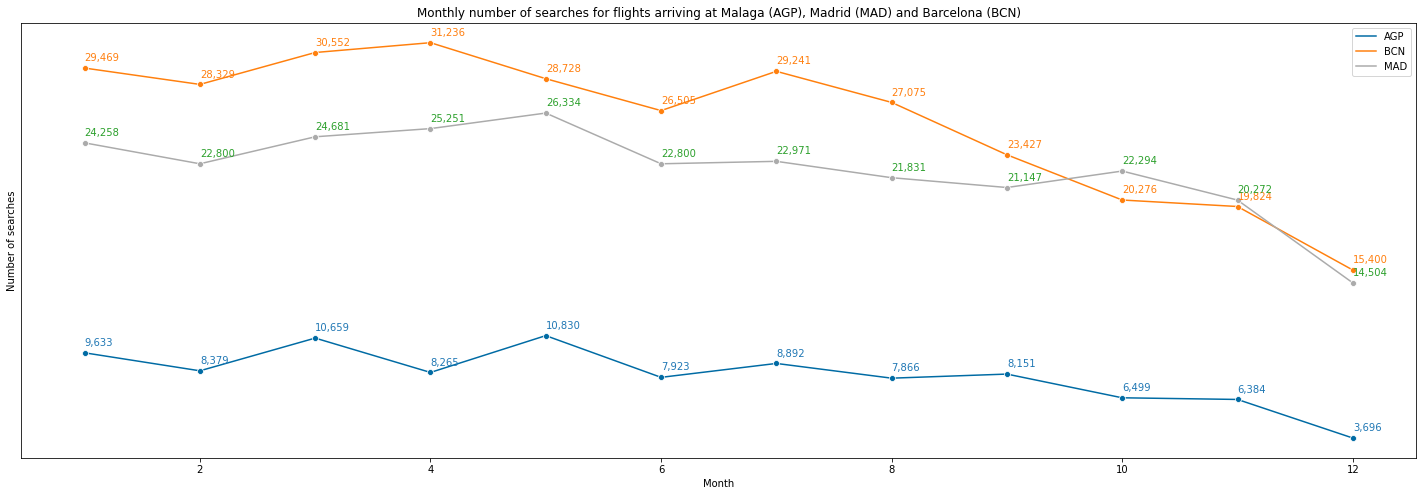

In [71]:
plt.style.use('tableau-colorblind10')

tab_colors = sns.color_palette("tab10")
palette = [tab_colors[0], tab_colors[1], tab_colors[2]]

fig, ax = plt.subplots(figsize=(25,8))

splot = sns.lineplot(data=df_sns, x='month', y='n', marker='o', hue='Destination', ci=None)

ax.legend()
ax.set_title('Monthly number of searches for flights arriving at Malaga (AGP), Madrid (MAD) and Barcelona (BCN)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.set_yticks([])

for item, color in zip(df_sns.groupby('Destination'), palette):
    # item[1] is a grouped DataFrame
    for x,y,m in item[1][['month','n','n']].values:
        ax.text(x, y + 500, '{:,}'.format(m), color=color)

plt.show()

#### Monthly barplot

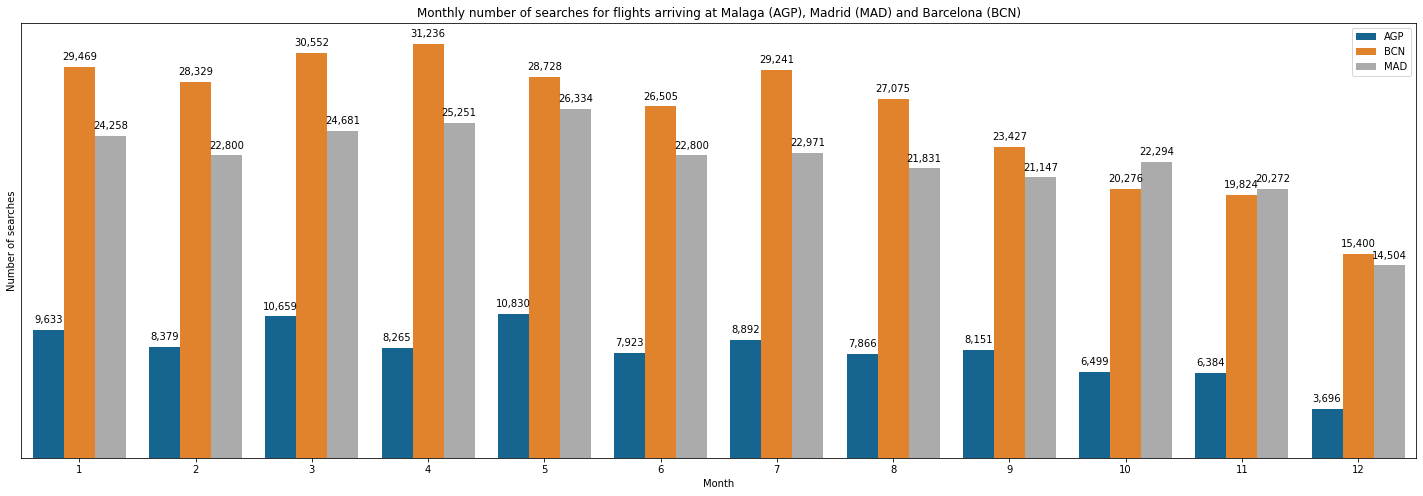

In [72]:
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(25,8))

splot = sns.barplot(data=df_sns, x='month', y='n', hue='Destination', ci=None)

ax.legend()
ax.set_title('Monthly number of searches for flights arriving at Malaga (AGP), Madrid (MAD) and Barcelona (BCN)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.set_yticks([])
autolabel(splot)

plt.show()